In [19]:
import pandas as pd

# Replace 'file_path' with the path to your actual file 
df = pd.read_csv('../results/BERT-SVM/100000/bert-base.txt', sep='    ', header=0)

<ipython-input-19-24c614e9fa83>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../results/BERT-SVM/100000/bert-base.txt', sep='    ', header=0)


In [20]:
import matplotlib.pyplot as plt

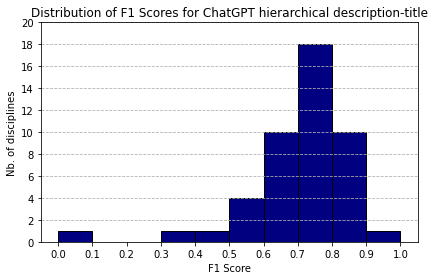

In [21]:
# Extracting the 'f1-score' and converting it to the start of bin values for plotting
df['Bin Start'] = df['f1-score'] // 0.1 * 0.1

# Group by the 'Bin Start' to count occurrences in each bin
bin_counts = df.groupby('Bin Start').size()

# Plot
fig, ax = plt.subplots()

# Since we're working with bins of size 0.1, we directly use 'Bin Start' values as x and counts as y
ax.bar(bin_counts.index, bin_counts.values, width=0.1, align='edge', color='navy', edgecolor='black')

# Setting x-ticks to include all bin starts plus the end of the last bin
# Ensure we cover all bins by including an extra step beyond the last bin start
bins = bin_counts.index.tolist() + [bin_counts.index[-1] + 0.1]
bins = [x/10 for x in range(11)]
ax.set_xticks(bins)

plt.title('Distribution of F1 Scores for ChatGPT hierarchical description-title')
plt.xlabel('F1 Score')
plt.ylabel('Nb. of disciplines')
plt.grid(axis='y', linestyle='--')
plt.yticks(range(0, 21, 2))
plt.tight_layout()
plt.show()

In [4]:
bins = [i / 10.0 for i in range(11)]  # Creates bins from 0.0 to 1.0 with a step of 0.1
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

In [5]:
df = df[:-4]

In [6]:
df['f1_score_bin'] = pd.cut(df['f1-score'], bins=bins, labels=labels, include_lowest=True)

In [7]:
df

,discipline,precision,recall,f1-score,support,Bin Start,f1_score_bin
0,"agriculture, forestry, and fisheries",0.40,1.00,0.57,10,0.5,0.5-0.6
1,animal and dairy science,0.92,0.79,0.85,14,0.8,0.8-0.9
2,archaeology,0.80,0.67,0.73,12,0.7,0.7-0.8
3,"art (arts, history of arts, performing arts, m...",0.37,0.50,0.42,14,0.4,0.4-0.5
4,basic medicine,0.56,0.29,0.38,17,0.3,0.3-0.4
5,biological sciences,0.74,0.62,0.68,32,0.6,0.6-0.7
6,chemical engineering,0.22,0.73,0.33,11,0.3,0.3-0.4
7,chemical sciences,0.47,0.50,0.48,30,0.4,0.4-0.5
8,civil engineering,0.86,0.38,0.52,16,0.5,0.5-0.6
9,clinical medicine,0.44,0.60,0.51,20,0.5,0.5-0.6


In [8]:
f1_score_distribution = df['f1_score_bin'].value_counts().sort_index()


f1_score_bin
0.0-0.1     3
0.1-0.2     1
0.2-0.3     3
0.3-0.4    12
0.4-0.5     9
0.5-0.6     7
0.6-0.7     4
0.7-0.8     2
0.8-0.9     1
0.9-1.0     0
Name: count, dtype: int64


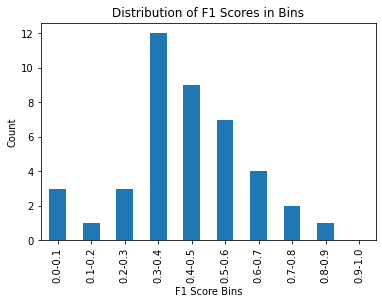

In [9]:
print(f1_score_distribution)

# For plotting
import matplotlib.pyplot as plt
f1_score_distribution.plot(kind='bar')
plt.title('Distribution of F1 Scores in Bins')
plt.xlabel('F1 Score Bins')
plt.ylabel('Count')
plt.show()

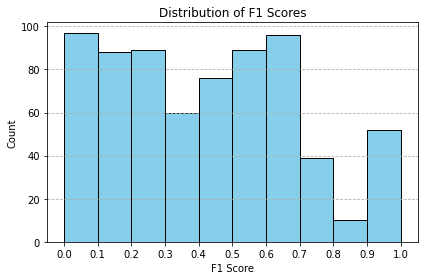

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulating the DataFrame setup (replace with your actual data processing)
data = {
    'F1 Score Bin': ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', 
                     '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0'],
    'Count': np.random.randint(10, 100, size=10)  # Example counts
}
df = pd.DataFrame(data)

# Convert F1 Score Bin to the start of each bin for positioning
df['Bin Start'] = df['F1 Score Bin'].apply(lambda x: float(x.split('-')[0]))

# Plot
fig, ax = plt.subplots()

# Plotting the bars with 'Bin Start' as the x positions
ax.bar(df['Bin Start'], df['Count'], width=0.1, align='edge', color='skyblue', edgecolor='black')

# Setting x-ticks to show the start and end of the bins
# Adding the last bin end manually
bins = df['Bin Start'].tolist() + [1.0]
ax.set_xticks(bins)

plt.title('Distribution of F1 Scores')
plt.xlabel('F1 Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()